In [202]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [203]:
df = pd.read_csv('./DHS_Daily_Report_2020.csv')
df.head()

,Date,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Easter,Thanksgiving,Christmas
0,1/1/2014,28770,21919,50689,7269,2650,9919,10469,14897,21919,1866,3954,0,0,0
1,1/2/2014,28843,21954,50797,7289,2661,9950,10484,14930,21954,1871,3963,0,0,0
2,1/3/2014,28947,22007,50954,7323,2678,10001,10521,14978,22007,1872,3968,0,0,0
3,1/4/2014,28954,22003,50957,7320,2684,10004,10520,14971,22003,1877,3979,0,0,0
4,1/5/2014,28991,21966,50957,7386,2692,10078,10502,14941,21966,1874,3972,0,0,0


In [204]:
df = df[['Date', 'Total Individuals in Shelter', 'Easter', 'Thanksgiving', 'Christmas']]
df.head()

,Date,Total Individuals in Shelter,Easter,Thanksgiving,Christmas
0,1/1/2014,50689,0,0,0
1,1/2/2014,50797,0,0,0
2,1/3/2014,50954,0,0,0
3,1/4/2014,50957,0,0,0
4,1/5/2014,50957,0,0,0


In [205]:
df.Date = pd.to_datetime(df.Date)

In [206]:
df.Date

0      2014-01-01
1      2014-01-02
2      2014-01-03
3      2014-01-04
4      2014-01-05
          ...    
2552   2020-12-27
2553   2020-12-28
2554   2020-12-29
2555   2020-12-30
2556   2020-12-31
Name: Date, Length: 2557, dtype: datetime64[ns]

In [207]:
df = df.loc[df.Date <= "2020-12-01",
              ["Date", "Total Individuals in Shelter",
               "Easter", "Thanksgiving", "Christmas"]]
df.head()              

,Date,Total Individuals in Shelter,Easter,Thanksgiving,Christmas
0,2014-01-01,50689,0,0,0
1,2014-01-02,50797,0,0,0
2,2014-01-03,50954,0,0,0
3,2014-01-04,50957,0,0,0
4,2014-01-05,50957,0,0,0


In [208]:
#renaming variables
df = df.rename(columns = {'Total Individuals in Shelter': 'y',
                          'Date': 'ds'})
df.head(1)

,ds,y,Easter,Thanksgiving,Christmas
0,2014-01-01,50689,0,0,0


In [209]:
easter_date = df[df.Easter == 1]['ds']
easter_holiday = pd.DataFrame({
    'holiday':'Easter',
    'ds':pd.to_datetime(easter_date),
    'lower_window': -3,
    'upper_window': 1
})
easter_holiday.head()

,holiday,ds,lower_window,upper_window
109,Easter,2014-04-20,-3,1
459,Easter,2015-04-05,-3,1
816,Easter,2016-03-27,-3,1
1201,Easter,2017-04-16,-3,1
1551,Easter,2018-04-01,-3,1


In [210]:
thanksgiving_date = df[df.Thanksgiving == 1].ds
thanksgiving_holiday = pd.DataFrame({
    'holiday':'Thanksgiving',
    'ds':pd.to_datetime(thanksgiving_date),
    'lower_window': 0,
    'upper_window': 1
})
thanksgiving_holiday.head()

,holiday,ds,lower_window,upper_window
330,Thanksgiving,2014-11-27,0,1
694,Thanksgiving,2015-11-26,0,1
1058,Thanksgiving,2016-11-24,0,1
1422,Thanksgiving,2017-11-23,0,1
1786,Thanksgiving,2018-11-22,0,1


In [211]:
christmas_date = df[df.Christmas == 1].ds
christmas_holiday = pd.DataFrame({
    'holiday':'Christmas',
    'ds':pd.to_datetime(christmas_date),
    'lower_window': -1,
    'upper_window': 1
})
christmas_holiday.head()

,holiday,ds,lower_window,upper_window
358,Christmas,2014-12-25,-1,1
723,Christmas,2015-12-25,-1,1
1089,Christmas,2016-12-25,-1,1
1454,Christmas,2017-12-25,-1,1
1819,Christmas,2018-12-25,-1,1


In [322]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
    {'holiday': 'lockdown_2', 'ds': '2020-07-09', 'lower_window': 0, 'ds_upper': '2020-10-27'},
    {'holiday': 'lockdown_3', 'ds': '2021-02-13', 'lower_window': 0, 'ds_upper': '2021-02-17'},
    {'holiday': 'lockdown_4', 'ds': '2021-05-28', 'lower_window': 0, 'ds_upper': '2021-06-10'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
lockdowns

,holiday,ds,lower_window,ds_upper,upper_window
0,lockdown_1,2020-03-21,0,2020-06-06,77
1,lockdown_2,2020-07-09,0,2020-10-27,110
2,lockdown_3,2021-02-13,0,2021-02-17,4
3,lockdown_4,2021-05-28,0,2021-06-10,13


In [212]:
holidays = pd.concat([easter_holiday, thanksgiving_holiday, christmas_holiday, lockdowns])
holidays

,holiday,ds,lower_window,upper_window
109,Easter,2014-04-20,-3,1
459,Easter,2015-04-05,-3,1
816,Easter,2016-03-27,-3,1
1201,Easter,2017-04-16,-3,1
1551,Easter,2018-04-01,-3,1
1936,Easter,2019-04-21,-3,1
2293,Easter,2020-04-12,-3,1
330,Thanksgiving,2014-11-27,0,1
694,Thanksgiving,2015-11-26,0,1
1058,Thanksgiving,2016-11-24,0,1


In [213]:
m = Prophet(holidays = holidays,
            seasonality_mode = 'multiplicative',
            seasonality_prior_scale = 20,
            changepoint_prior_scale = 0.1,
            holidays_prior_scale = 10)
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [227]:
df.tail()

,ds,y,Easter,Thanksgiving,Christmas
2522,2020-11-27,53729,4264,0,0
2523,2020-11-28,53743,4277,0,0
2524,2020-11-29,53708,4242,0,0
2525,2020-11-30,53745,4249,0,0
2526,2020-12-01,53686,4232,0,0


c:\Users\Lab03\anaconda3\envs\py37\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
c:\Users\Lab03\anaconda3\envs\py37\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


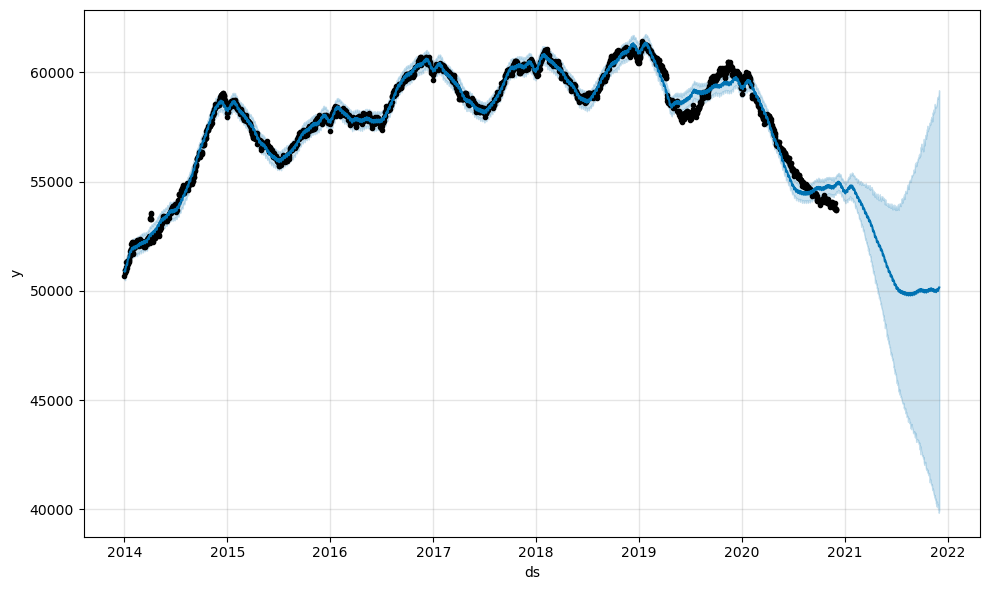

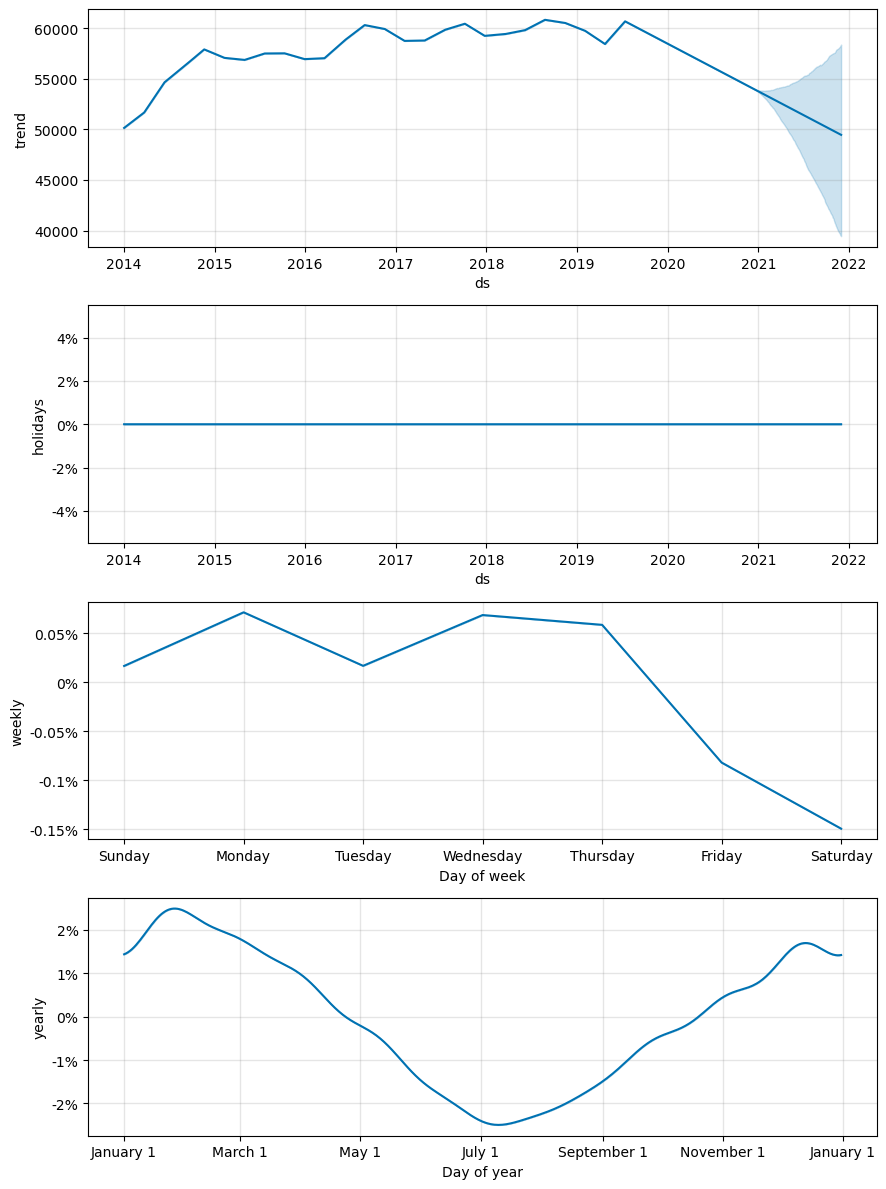

In [229]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
m.plot_components(forecast);

In [232]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Easter,Easter_lower,Easter_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
2887,2021-11-27,49515.710052,39970.264302,58900.228919,39612.681570,58212.442433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009665,0.009665,0.009665,-0.001493,-0.001493,-0.001493,0.011158,0.011158,0.011158,0.0,0.0,0.0,49994.267321
2888,2021-11-28,49502.824713,40193.839928,58865.075787,39557.794692,58250.972990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011842,0.011842,0.011842,0.000165,0.000165,0.000165,0.011677,0.011677,0.011677,0.0,0.0,0.0,50089.059969
2889,2021-11-29,49489.939374,39838.321676,59025.225109,39521.721041,58292.947035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012916,0.012916,0.012916,0.000712,0.000712,0.000712,0.012204,0.012204,0.012204,0.0,0.0,0.0,50129.166723
2890,2021-11-30,49477.054035,39882.842758,59183.868741,39484.547939,58337.031065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012899,0.012899,0.012899,0.000167,0.000167,0.000167,0.012733,0.012733,0.012733,0.0,0.0,0.0,50115.281509
2891,2021-12-01,49464.168696,39969.008786,59139.390965,39447.374836,58391.071389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013940,0.013940,0.013940,0.000684,0.000684,0.000684,0.013256,0.013256,0.013256,0.0,0.0,0.0,50153.711639


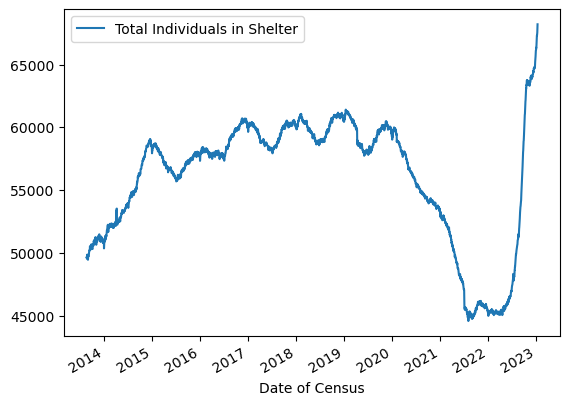

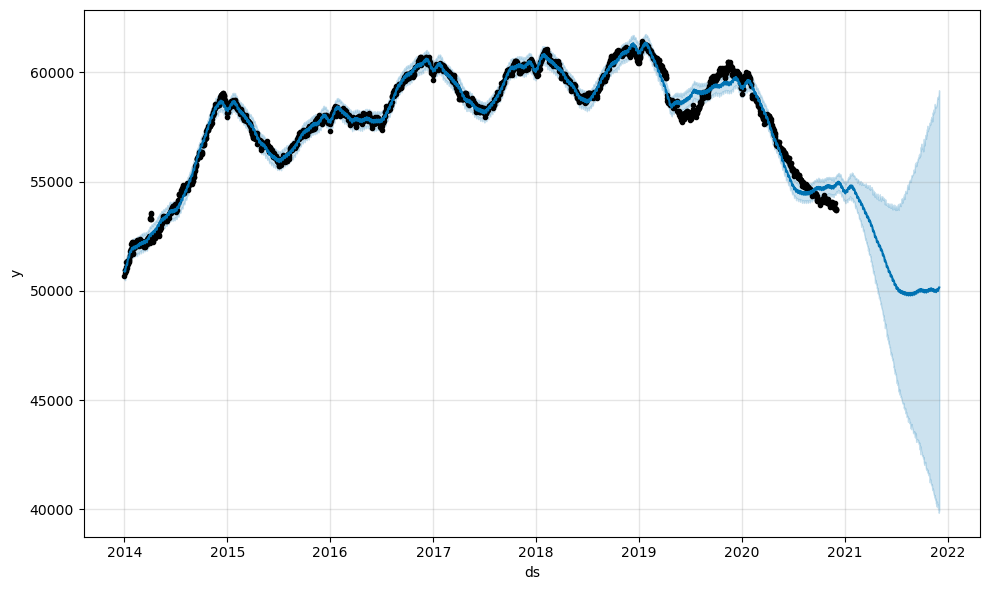

In [315]:
test = pd.read_csv('DHS_Daily_Report_2022.csv', index_col='Date of Census', parse_dates=True)
test = test['Total Individuals in Shelter']
test.plot(legend=True)
m.plot(forecast);

<AxesSubplot:title={'center':'Total Individuals in Shelter Predictions'}, xlabel='Date', ylabel='y'>

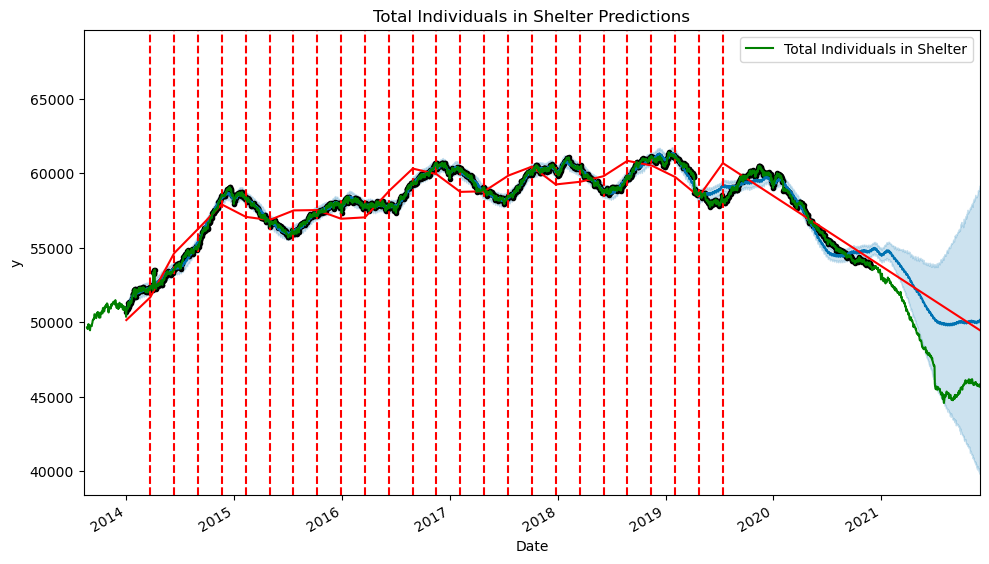

In [321]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast, xlabel='Date')
plt.xlim(right=pd.to_datetime('2021-12-01'))
plt.title("Total Individuals in Shelter Predictions")
a = add_changepoints_to_plot(fig.gca(), m, forecast)
test.plot(legend=True, color='green', xlabel='Date')

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
forecast[-365:]['ds']

2527   2020-12-02
2528   2020-12-03
2529   2020-12-04
2530   2020-12-05
2531   2020-12-06
          ...    
2887   2021-11-27
2888   2021-11-28
2889   2021-11-29
2890   2021-11-30
2891   2021-12-01
Name: ds, Length: 365, dtype: datetime64[ns]

In [ ]:
predictions = forecast[-365:]['yhat']

In [ ]:
predictions.head()

2527    54943.799480
2528    54951.628503
2529    54887.383253
2530    54860.823449
2531    54958.271799
Name: yhat, dtype: float64

In [ ]:
test = pd.read_csv('DHS_Daily_Report_2022.csv', index_col='Date of Census', parse_dates=True)
test

,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
Date of Census,,,,,,,,,,,,
2021-09-29,30801,14812,45613,12291,4061,16352,8503,11156,14812,25968,1570,3293
2021-09-30,30826,14798,45624,12286,4100,16386,8500,11157,14798,25955,1565,3283
2021-10-01,30769,14815,45584,12199,4090,16289,8513,11177,14815,25992,1575,3303
2021-10-02,30648,14833,45481,12105,4067,16172,8532,11207,14833,26040,1558,3269
2021-10-03,30818,14863,45681,12210,4088,16298,8545,11228,14863,26091,1569,3292
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-05,45296,22025,67321,15835,4393,20228,12847,19514,22025,41539,2612,5554
2023-01-06,45347,22096,67443,15854,4368,20222,12889,19579,22096,41675,2608,5546
2023-01-07,45437,22116,67553,15896,4372,20268,12895,19617,22116,41733,2611,5552
